# Customer Churn Prediction

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

#### Import Dataset

In [2]:
dataset = pd.read_csv("customer_churn_data.csv")

#### Exploratory Data Analysis

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

In [7]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# check for nulls
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

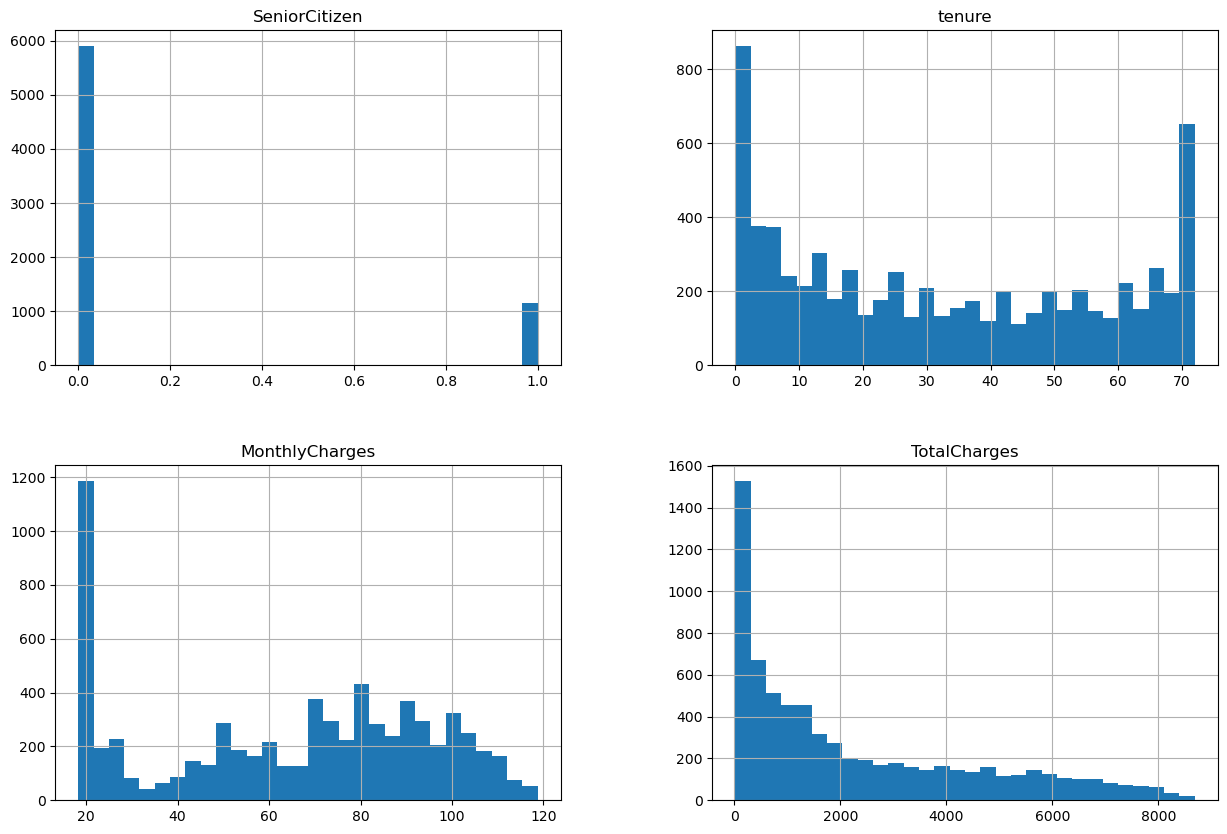

In [9]:
dataset.hist(bins=30, figsize=(15, 10))

In [10]:
# checking for balance in each field
print(dataset["gender"].value_counts())
print(dataset["SeniorCitizen"].value_counts())
print(dataset["Partner"].value_counts())
print(dataset["Dependents"].value_counts())
print(dataset["PhoneService"].value_counts())
print(dataset["MultipleLines"].value_counts())
print(dataset["InternetService"].value_counts())
print(dataset["OnlineSecurity"].value_counts())
print(dataset["OnlineBackup"].value_counts())
print(dataset["DeviceProtection"].value_counts())
print(dataset["TechSupport"].value_counts())
print(dataset["StreamingTV"].value_counts())
print(dataset["StreamingMovies"].value_counts())
print(dataset["Contract"].value_counts())
print(dataset["PaperlessBilling"].value_counts())
print(dataset["PaymentMethod"].value_counts())
print(dataset["Churn"].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

#### Testing out some hypothesis

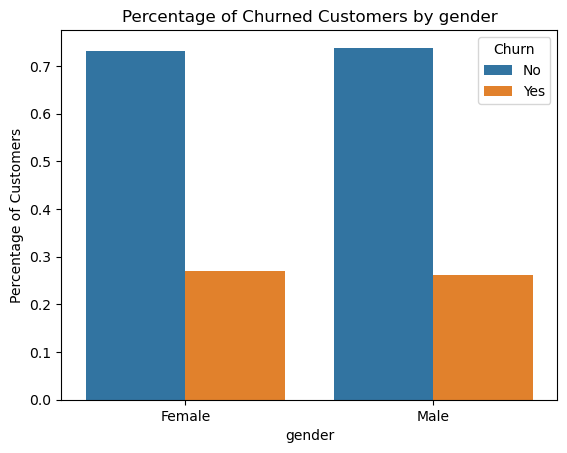

Looking at the plot we can see that churn trends in both males and females are similar


In [11]:
## Does gender influence churn?

df_percent = dataset.groupby(['gender', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='gender', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='gender', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by gender')
plt.xlabel('gender')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("Looking at the plot we can see that churn trends in both males and females are similar")

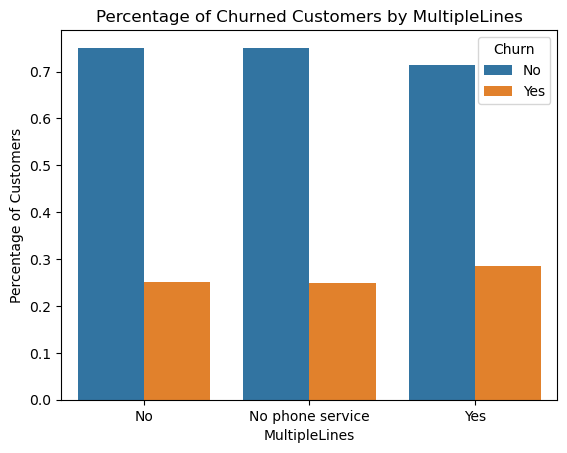

Here also for the churn trends for multiple lines is similar for all three cases


In [12]:
## Does MultipleLines have an effect on churn?
df_percent = dataset.groupby(['MultipleLines', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='MultipleLines', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='MultipleLines', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("Here also for the churn trends for multiple lines is similar for all three cases")

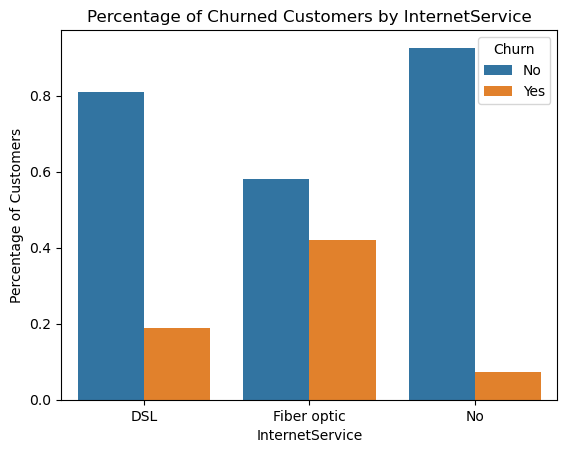

% Churn is least for customers without Internet Service, so there is a possibility that the internet services need improvement.


In [13]:
## Does InternetService have an effect on churn?
df_percent = dataset.groupby(['InternetService', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='InternetService', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='InternetService', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("% Churn is least for customers without Internet Service, so there is a possibility that the internet services need improvement.")

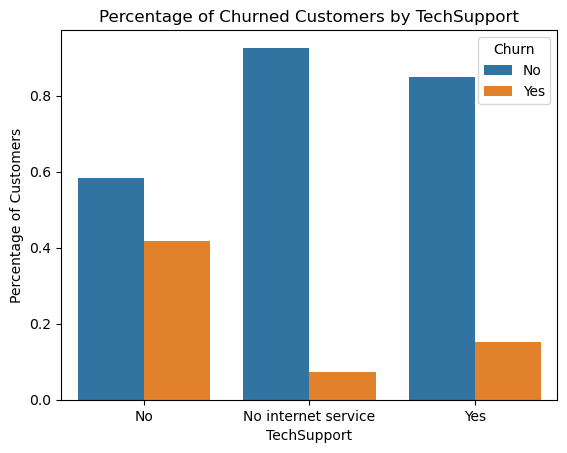

This plot shows that the customers who reach out to tech support churn less


In [14]:
## Does TechSupport have an effect on churn?
df_percent = dataset.groupby(['TechSupport', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='TechSupport', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='TechSupport', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("This plot shows that the customers who reach out to tech support churn less")

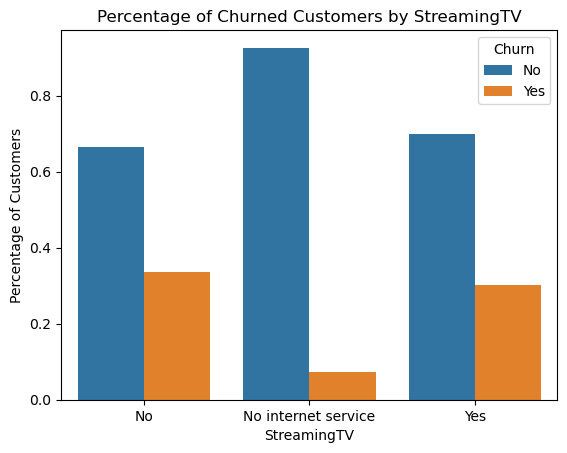

Here also people without internet service churn less


In [15]:
## Does StreamingTV have an effect on churn?
df_percent = dataset.groupby(['StreamingTV', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='StreamingTV', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='StreamingTV', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("Here also people without internet service churn less")

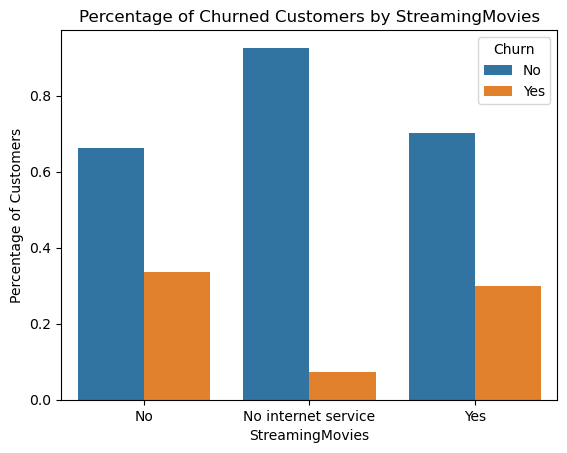

Here again the trend with no internet service churn less.


In [16]:
## Does StreamingMovies have an effect on churn?
df_percent = dataset.groupby(['StreamingMovies', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='StreamingMovies', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='StreamingMovies', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("Here again the trend with no internet service churn less.")

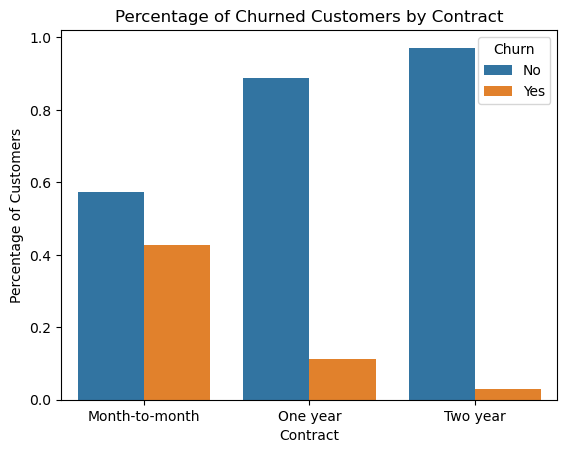

As expected customers in the monthly plan churn most, and those with two year plans churn the least.


In [17]:
## Does Contract have an effect on churn?
df_percent = dataset.groupby(['Contract', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='Contract', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='Contract', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by Contract')
plt.xlabel('Contract')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("As expected customers in the monthly plan churn most, and those with two year plans churn the least.")

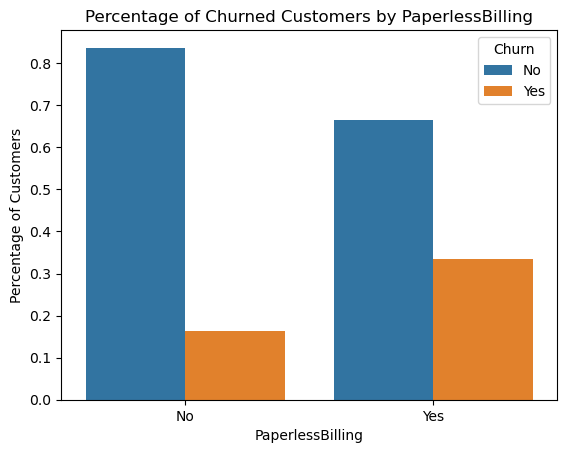

Customers who go for paperless billing churn more


In [18]:
## Does Contract have an effect on churn?
df_percent = dataset.groupby(['PaperlessBilling', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='PaperlessBilling', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='PaperlessBilling', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Percentage of Customers')

# Show the plot
plt.show()

print("Customers who go for paperless billing churn more")

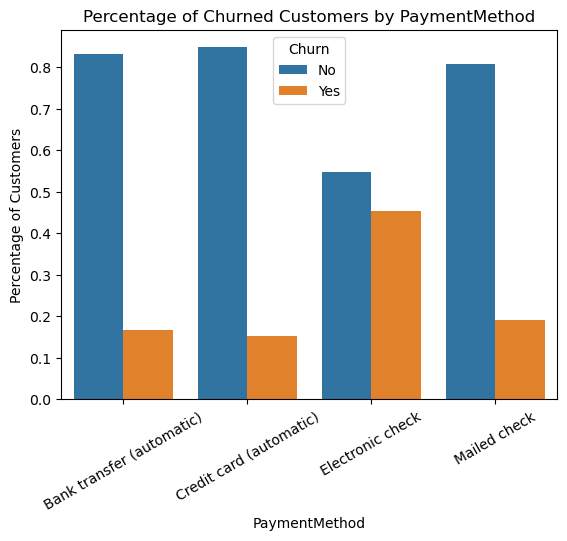

Customers who use electronic check as payment mode churn the most.


In [19]:
## Does Contract have an effect on churn?
df_percent = dataset.groupby(['PaymentMethod', 'Churn'])['Churn'].count().unstack()
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0).reset_index()
df_percent = pd.melt(df_percent, id_vars='PaymentMethod', var_name='Churn', value_name='Percent')

# Plot the percentages as a barplot
sns.barplot(x='PaymentMethod', y='Percent', hue='Churn',
            data=df_percent)

# Set the plot title and axis labels
plt.title('Percentage of Churned Customers by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=30)
# Show the plot
plt.show()

print("Customers who use electronic check as payment mode churn the most.")

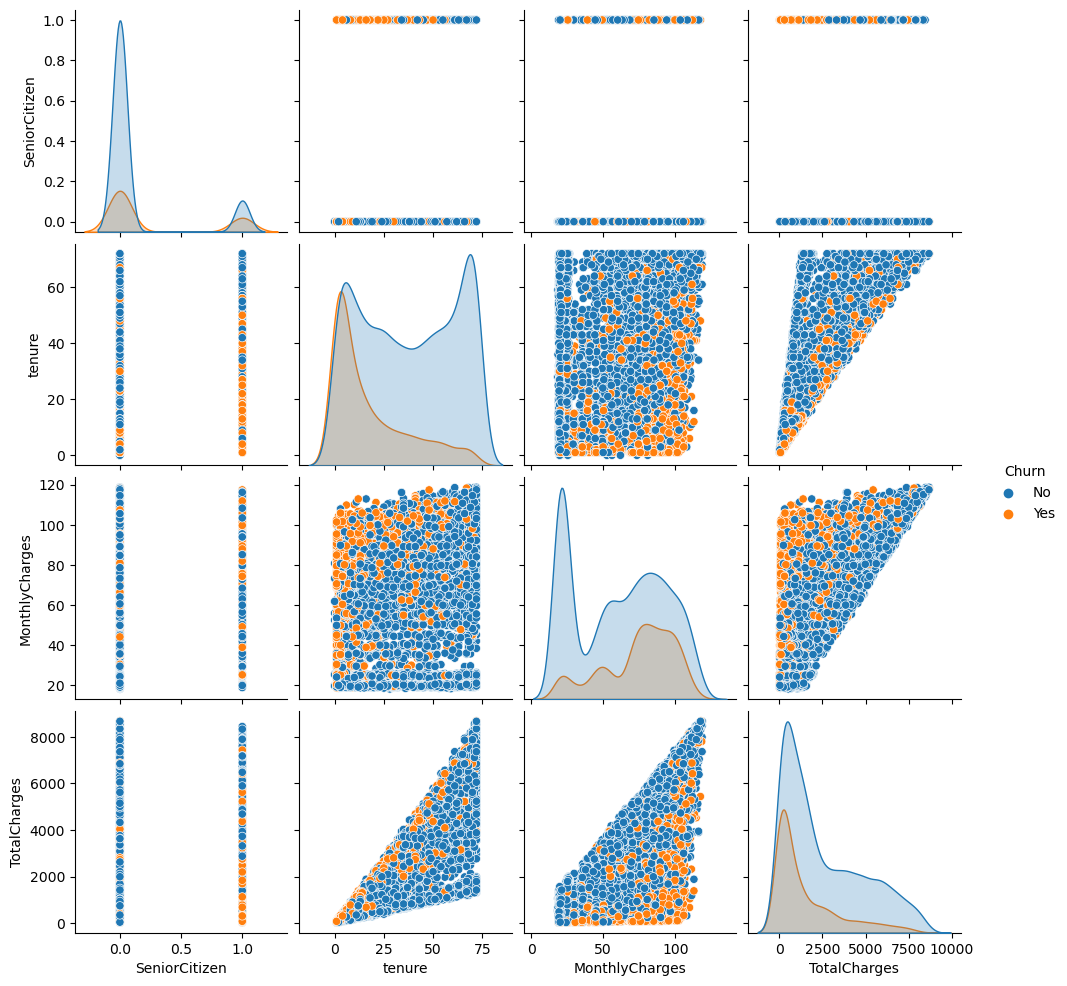

Customers who have higher monthly charges churn more.


In [20]:
sns.pairplot(data = dataset, hue='Churn')
plt.show()

print("Customers who have higher monthly charges churn more.")

#### Data Cleaning

In [21]:
# Removing customerId column
dataset = dataset.drop('customerID',axis=1)

# Replacing Nan's
dataset['TotalCharges'].fillna((dataset['TotalCharges'].mean()), inplace=True)
dataset['MonthlyCharges'].fillna((dataset['MonthlyCharges'].mean()), inplace=True)

In [22]:
# Factorizing columns
for column in dataset.columns:
    if(len(dataset[column].unique())==2):
        dataset[column] = pd.factorize(dataset[column])[0]
    elif(len(dataset[column].unique())<10):
        df_dummies = pd.get_dummies(dataset[column], prefix=column)
        dataset = pd.concat([dataset, df_dummies], axis=1)
        dataset = dataset.drop(column, axis=1)
    else:
        continue

#### Checking correlation

Text(0.5, 1.0, 'Correlation with Churn Rate')

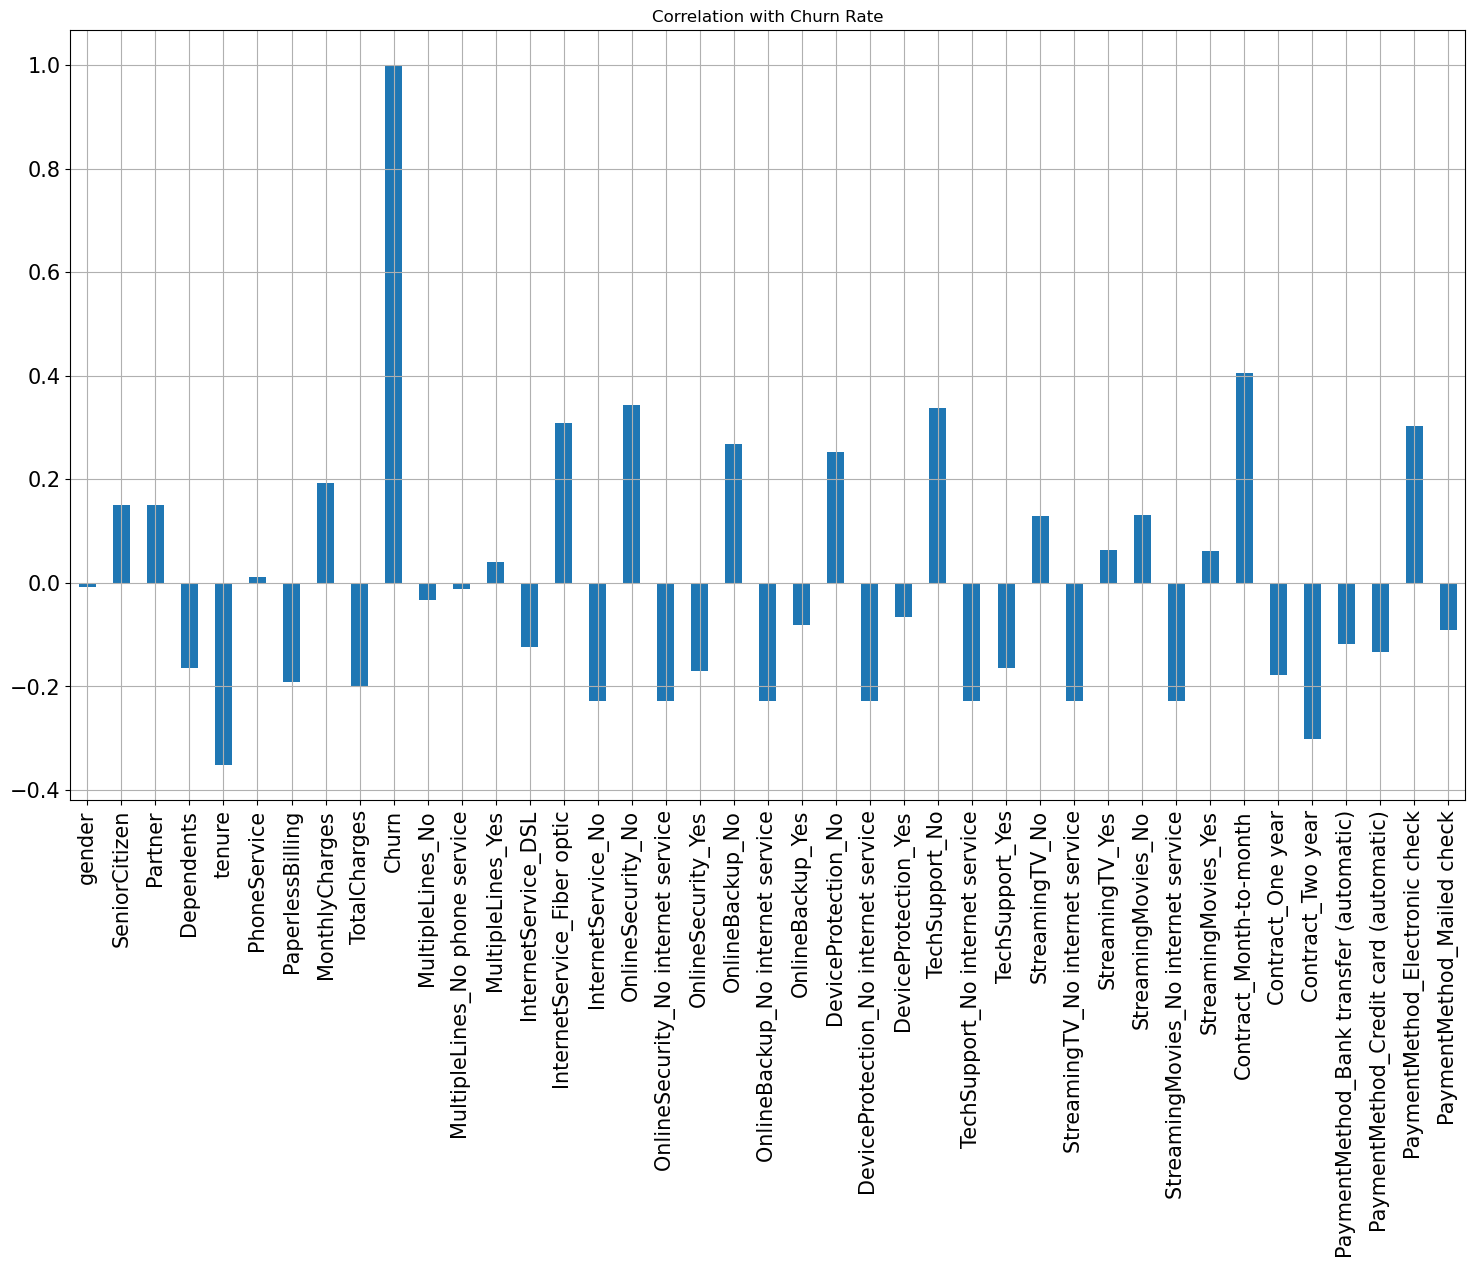

In [23]:
corr_matrix = dataset.corrwith(dataset['Churn'])
corr_matrix.plot.bar(figsize = (18, 10), fontsize = 15, rot = 90, grid = True)

plt.title('Correlation with Churn Rate')


#### Split into train and test

In [24]:
# Stratify will ensure balanced split
response = dataset['Churn']
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.3, 
                                                    random_state = 2110)


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4930, 41)
Number transactions y_train dataset:  (4930,)
Number transactions X_test dataset:  (2113, 41)
Number transactions y_test dataset:  (2113,)


#### Feature Scaling

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Definition

In [26]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 500],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

#### Grid Search CV

In [27]:
# Function to run GridSearchCV on each model and print the results
def run_gridsearch(model_name, model, params):
    clf = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
    clf.fit(X_train, y_train)
    print(model_name)
    print('Best params:', clf.best_params_)
    print('Train AUC:', clf.best_score_)
    print('Test AUC:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Run GridSearchCV on each model and print the results
for name, model in models.items():
    run_gridsearch(name, model['model'], model['params'])

Logistic Regression
Best params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Train AUC: 1.0
Test AUC: 1.0
Random Forest
Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train AUC: 1.0
Test AUC: 1.0
KNN
Best params: {'n_neighbors': 7, 'weights': 'distance'}
Train AUC: 0.7736182024339986
Test AUC: 0.7875497317014903


In [28]:
# After running GridSearchCV, select the best model and hyperparameters based on the test AUC score.
# Once you have selected the best model, you can evaluate its performance on the test set using
# a confusion matrix, precision and recall scores, and ROC AUC score, as follows:

# Fit the best model with the selected hyperparameters on the entire training set
best_model = KNeighborsClassifier(n_neighbors=7,
            weights='distance')
# KNN with {'n_neighbors': 7, 'weights': 'distance'}
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [29]:
#Evaluate results
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print()
acc = accuracy_score(y_test, y_pred )
print("Accuracy is "+str(acc))
prec = precision_score(y_test, y_pred )
print("Precision is "+str(prec))
rec = recall_score(y_test, y_pred )
print("Recall is "+str(rec))
f1 = f1_score(y_test, y_pred )
print("F1 score is "+str(f1))

Confusion Matrix
[[1403  149]
 [ 283  278]]

Accuracy is 0.795551348793185
Precision is 0.6510538641686182
Recall is 0.49554367201426025
F1 score is 0.562753036437247
